In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
train_label = pd.read_csv('train_label.csv',header=None)
train_label.columns = ['total_booking']
print(train.shape)

(8708, 9)


In [3]:
m_train = train.join(train_label)
print(m_train.shape)
m_train.head()

(8708, 10)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,total_booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


In [4]:
train[train['weather'] == ' Heavy Rain + Thunderstorm ']

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
8109,1/9/2012 18:00,Spring,0,1,Heavy Rain + Thunderstorm,8.2,11.365,86,6.0032


## Since  Heavy Rain + Thunderstorm  contains only 1 record,so i am removing the record


In [5]:
m_train = m_train.drop(train[train['weather'] == ' Heavy Rain + Thunderstorm '].index)
print(m_train.shape)

(8707, 10)


In [6]:
m_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8707 entries, 0 to 8707
Data columns (total 10 columns):
datetime         8707 non-null object
season           8707 non-null object
holiday          8707 non-null int64
workingday       8707 non-null int64
weather          8707 non-null object
temp             8707 non-null float64
atemp            8707 non-null float64
humidity         8707 non-null int64
windspeed        8707 non-null float64
total_booking    8707 non-null int64
dtypes: float64(3), int64(4), object(3)
memory usage: 748.3+ KB


In [7]:
merged_train=m_train
merged_train['datetime'] = pd.to_datetime(m_train['datetime'])

print(merged_train.shape)
print(merged_train.head())
print(merged_train.isnull().sum())

(8707, 10)
             datetime  season  holiday  workingday              weather  \
0 2012-05-02 19:00:00  Summer        0           1   Clear + Few clouds   
1 2012-09-05 04:00:00    Fall        0           1   Clear + Few clouds   
2 2011-01-13 09:00:00  Spring        0           1   Clear + Few clouds   
3 2011-11-18 16:00:00  Winter        0           1   Clear + Few clouds   
4 2011-09-13 13:00:00    Fall        0           1   Clear + Few clouds   

    temp   atemp  humidity  windspeed  total_booking  
0  22.14  25.760        77    16.9979            504  
1  28.70  33.335        79    19.0012              5  
2   5.74   6.060        50    22.0028            139  
3  13.94  16.665        29     8.9981            209  
4  30.34  33.335        51    19.0012            184  
datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
total_booking    0
dtype: int64


In [8]:
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}


def extract_date(df,column):
    df[column+'_year'] = df[column].apply(lambda x :x.year)
    df[column+'_month'] = df[column].apply(lambda x :x.month)
    df[column+'_day'] = df[column].apply(lambda x: x.day)
    df[column+'_hour'] = df[column].apply(lambda x: x.hour)
    try:
        #df[column+'_weekday'] = df[column].apply(lambda x: datetime.datetime.strftime(x,'%A'))
        df[column+'_weekday'] = df['datetime'].dt.dayofweek.map(dayOfWeek)
    except ValueError:
        return None

In [9]:
extract_date(merged_train,'datetime')

In [10]:
print(merged_train.shape)
print(merged_train.columns)
merged_train.head()

(8707, 15)
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'total_booking', 'datetime_year',
       'datetime_month', 'datetime_day', 'datetime_hour', 'datetime_weekday'],
      dtype='object')


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,total_booking,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_weekday
0,2012-05-02 19:00:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,2012,5,2,19,Wednesday
1,2012-09-05 04:00:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,2012,9,5,4,Wednesday
2,2011-01-13 09:00:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,2011,1,13,9,Thursday
3,2011-11-18 16:00:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,2011,11,18,16,Friday
4,2011-09-13 13:00:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,2011,9,13,13,Tuesday


In [11]:
merged_train.apply(lambda x: sum(x.isnull()),axis=0)

datetime            0
season              0
holiday             0
workingday          0
weather             0
temp                0
atemp               0
humidity            0
windspeed           0
total_booking       0
datetime_year       0
datetime_month      0
datetime_day        0
datetime_hour       0
datetime_weekday    0
dtype: int64

In [12]:
merged_train_copy = merged_train.drop('datetime',axis=1)#.copy()
merged_train_copy.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,total_booking,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_weekday
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,2012,5,2,19,Wednesday
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,2012,9,5,4,Wednesday
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,2011,1,13,9,Thursday
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,2011,11,18,16,Friday
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,2011,9,13,13,Tuesday


Text(0.5, 1.0, 'Booking in summer .. . ')

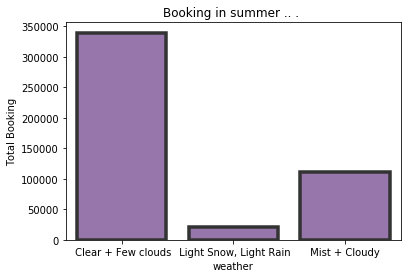

In [13]:
merged_train_copy_summer = merged_train_copy[merged_train_copy['season'] == 'Summer']
ywb = merged_train_copy_summer.groupby('weather')['total_booking'].sum()
x=sns.barplot(x=ywb.index,y=ywb.values,dodge=False,capsize=.5,linewidth=3.5, facecolor=(0.50, 0.35, 0.6, 0.82),errcolor=".2", edgecolor=".2")
#ywb.plot(kind='bar')
x.set_xlabel('weather')
x.set_ylabel('Total Booking')
x.set_title("Booking in summer .. . ")

Text(0.5, 1.0, 'Booking in Fall .. . ')

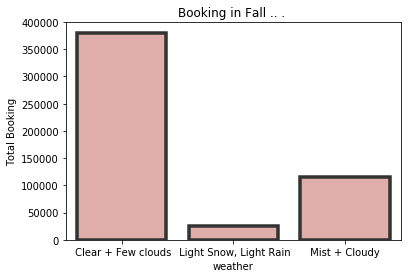

In [14]:
merged_train_copy_summer = merged_train_copy[merged_train_copy['season'] == 'Fall']
ywb = merged_train_copy_summer.groupby('weather')['total_booking'].sum()
x=sns.barplot(x=ywb.index,y=ywb.values,dodge=False,capsize=.5,linewidth=3.5, facecolor=(0.70, 0.25, 0.22, 0.42),errcolor=".2", edgecolor=".2")
#ywb.plot(kind='bar')
x.set_xlabel('weather')
x.set_ylabel('Total Booking')
x.set_title("Booking in Fall .. . ")

Text(0.5, 1.0, 'Booking in Spring .. . ')

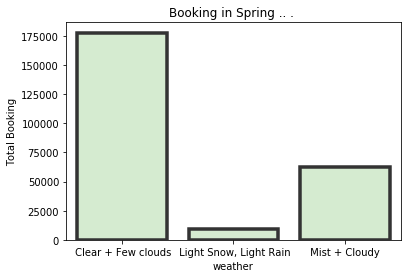

In [15]:
merged_train_copy_summer = merged_train_copy[merged_train_copy['season'] == 'Spring']
ywb = merged_train_copy_summer.groupby('weather')['total_booking'].sum()
x=sns.barplot(x=ywb.index,y=ywb.values,dodge=False,capsize=.5,linewidth=3.5, facecolor=(0.250, 0.65, 0.16, 0.22),errcolor=".2", edgecolor=".2")
#ywb.plot(kind='bar')
x.set_xlabel('weather')
x.set_ylabel('Total Booking')
x.set_title("Booking in Spring .. . ")

Text(0.5, 1.0, 'Booking in Winters .. . ')

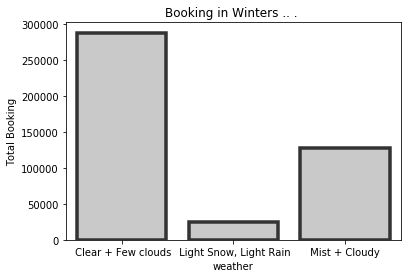

In [16]:
merged_train_copy_summer = merged_train_copy[merged_train_copy['season'] == 'Winter']
ywb = merged_train_copy_summer.groupby('weather')['total_booking'].sum()
x=sns.barplot(x=ywb.index,y=ywb.values,dodge=False,capsize=.5,linewidth=3.5, facecolor=(0.350, 0.35, 0.36, 0.32),errcolor=".2", edgecolor=".2")
#ywb.plot(kind='bar')
x.set_xlabel('weather')
x.set_ylabel('Total Booking')
x.set_title("Booking in Winters .. . ")

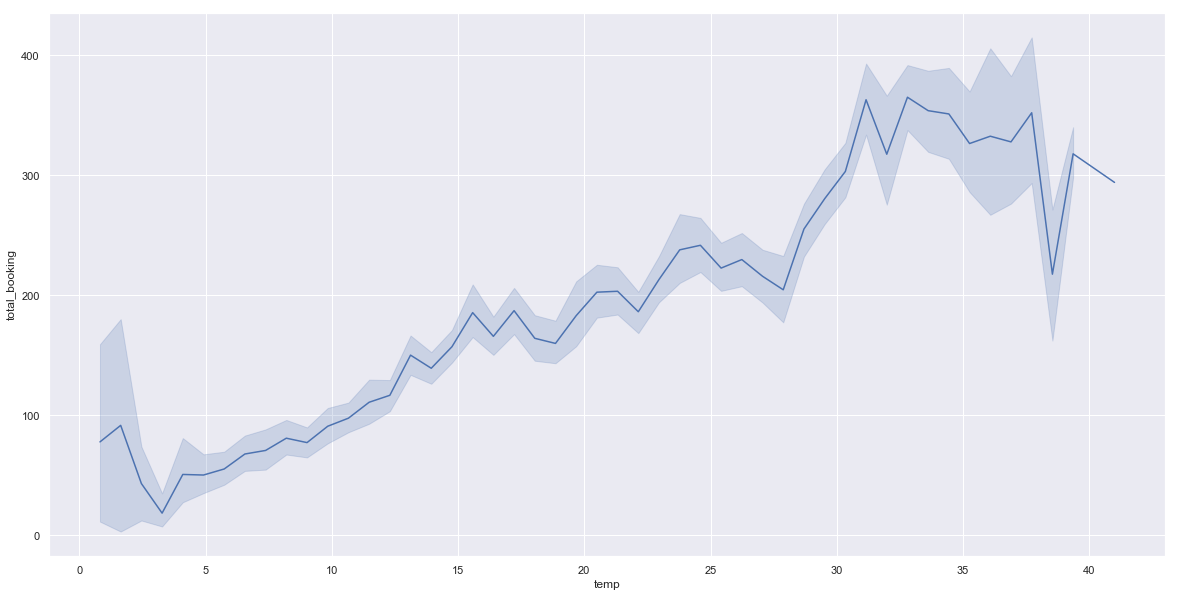

In [17]:
plt.figure(figsize=(20, 10))
sns.set(style="darkgrid")
sns.lineplot(x="temp", y="total_booking",
            #total_booking
             data=merged_train_copy)

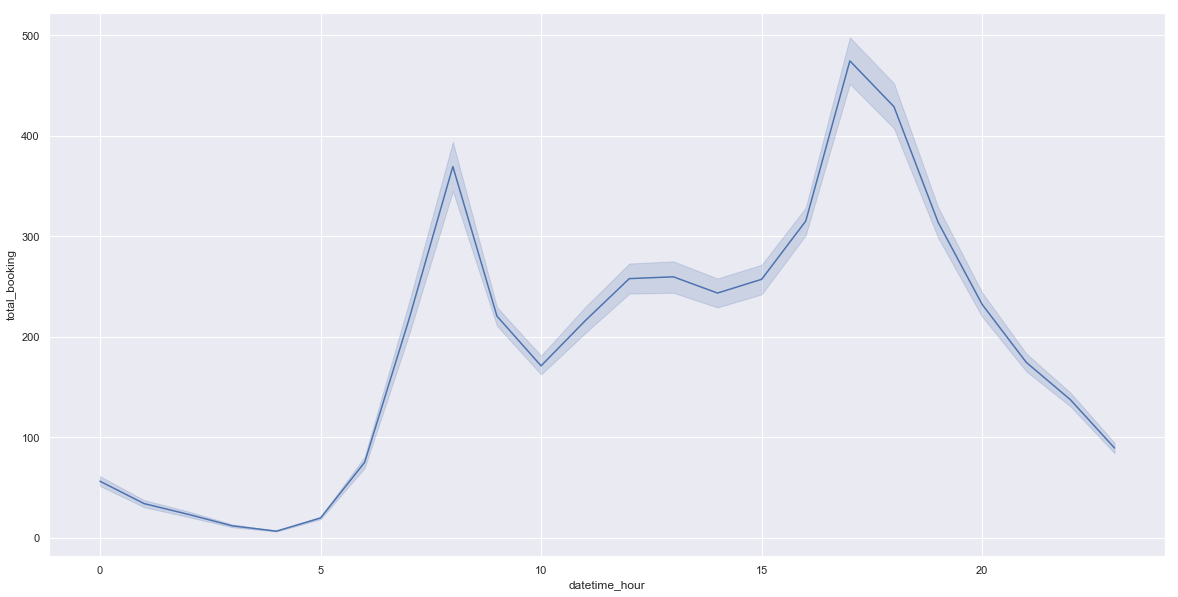

In [18]:
plt.figure(figsize=(20, 10))
sns.set(style="darkgrid")
sns.lineplot(x="datetime_hour", y="total_booking",
            #total_booking
             data=merged_train_copy)

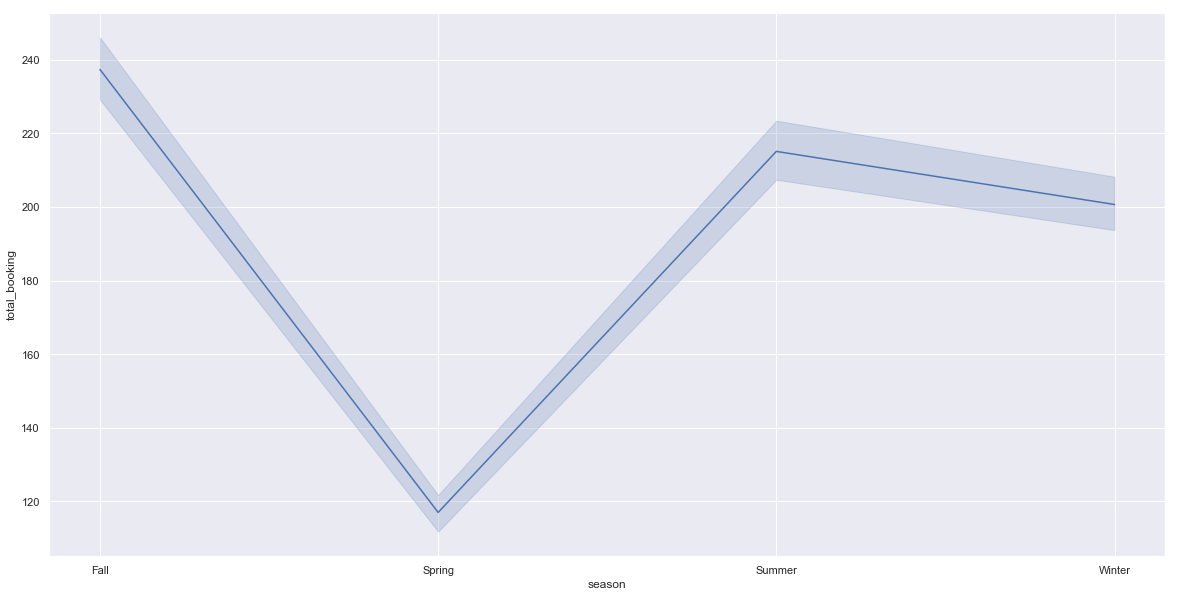

In [19]:
plt.figure(figsize=(20, 10))
sns.set(style="darkgrid")
sns.lineplot(x="season", y="total_booking",
            #total_booking
             data=merged_train_copy)

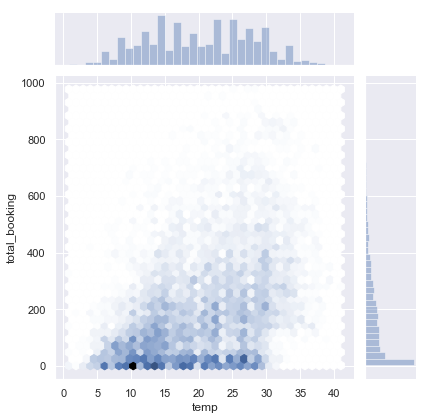

In [20]:
sns.axes_style('white')
g = sns.jointplot("temp", "total_booking", merged_train_copy, kind='hex')

Text(0.5, 1.0, 'Total Booking on Holidays')

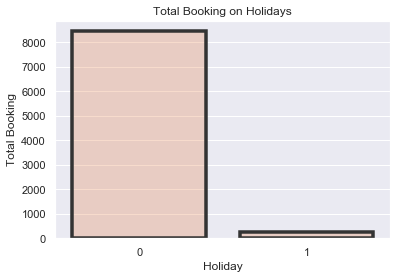

In [21]:
ywb = merged_train_copy.groupby('holiday')['total_booking'].count()
x=sns.barplot(x=ywb.index,y=ywb.values,dodge=False,capsize=.5,linewidth=3.5, facecolor=(0.90, 0.5, 0.3, 0.282),errcolor=".2", edgecolor=".2")
#ywb.plot(kind='bar')
x.set_xlabel('Holiday')
x.set_ylabel('Total Booking')
x.set_title("Total Booking on Holidays")

Text(0.5, 1.0, 'Total Booking Season-wise')

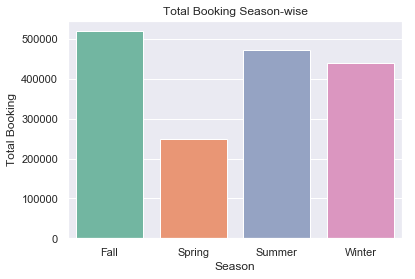

In [22]:
merged_train_copy.groupby('season').size()
ywb=merged_train_copy.groupby('season')['total_booking'].sum()
#ywb.index
x=sns.barplot(x=ywb.index,y=ywb.values,dodge=True,palette='Set2')#ywb.plot(kind='bar')
x.set_xlabel('Season')
x.set_ylabel('Total Booking')
x.set_title("Total Booking Season-wise")

Text(0.5, 1.0, 'Total Booking in the year 2011 and 2012')

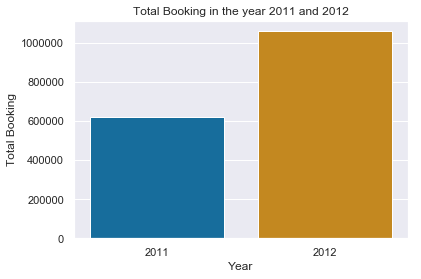

In [23]:
year_wize_booking = merged_train_copy.groupby('datetime_year').sum()
ywb=year_wize_booking['total_booking']#.value_counts()
x=sns.barplot(x=ywb.index,y=ywb.values,dodge=False,palette='colorblind')#ywb.plot(kind='bar')
x.set_xlabel('Year')
x.set_ylabel('Total Booking')
x.set_title("Total Booking in the year 2011 and 2012")

## When the weather is Clear + Few clouds .. then <b>Total Booking </b> is high


Text(0.5, 1.0, 'Total Booking Weather-wise')

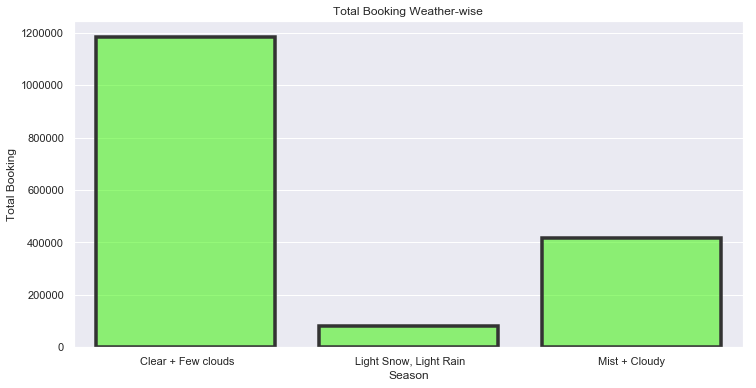

In [24]:
plt.figure(figsize=(12, 6))
ywb = merged_train_copy.groupby('weather')['total_booking'].sum()
x=sns.barplot(x=ywb.index,y=ywb.values,dodge=False,capsize=.5,linewidth=3.5, facecolor=(0.22, 0.95, 0.007, 0.53),errcolor=".2", edgecolor=".2")#ywb.plot(kind='bar')
x.set_xlabel('Season')
x.set_ylabel('Total Booking')
x.set_title("Total Booking Weather-wise")

Text(0.5, 1.0, 'Total Booking Month-wise')

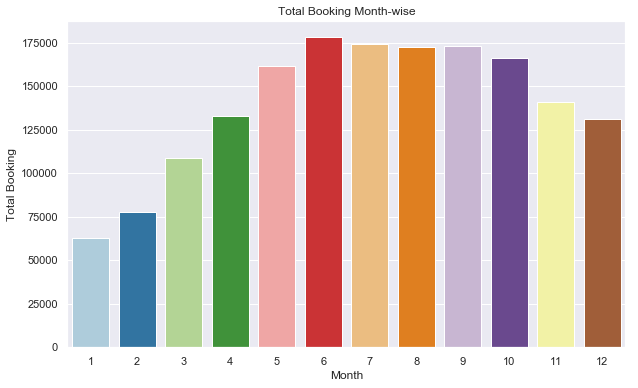

In [25]:
ywb = merged_train_copy.groupby('datetime_month')['total_booking'].sum()
plt.figure(figsize=(10, 6))
x=sns.barplot(x=ywb.index,y=ywb.values,dodge=False,palette='Paired')#ywb.plot(kind='bar')
x.set_xlabel('Month')
x.set_ylabel('Total Booking')
x.set_title("Total Booking Month-wise")

Text(0.5, 1.0, 'Total Booking Hour-wise')

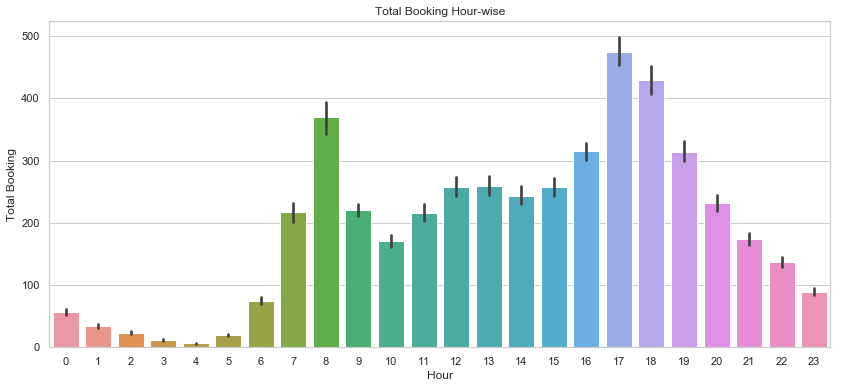

In [26]:
ywb = merged_train_copy.groupby('datetime_hour')['total_booking'].count()
plt.figure(figsize=(14, 6))
sns.set(style="whitegrid")
x=sns.barplot(x='datetime_hour',y='total_booking',data=merged_train_copy,dodge=False)#ywb.plot(kind='bar')
x.set_xlabel('Hour')
x.set_ylabel('Total Booking')
x.set_title("Total Booking Hour-wise")

Text(0.5, 1.0, 'Total Booking day-wise')

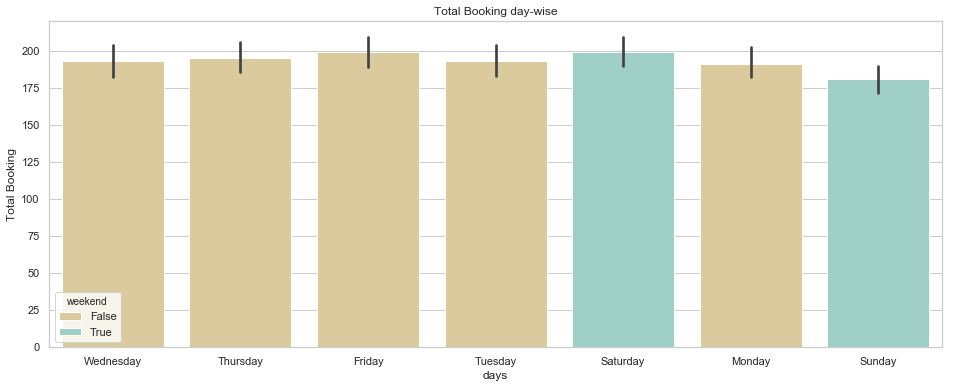

In [27]:
plt.figure(figsize=(16, 6))
merged_train_copy["weekend"] = merged_train_copy["datetime_weekday"].isin(["Saturday", "Sunday"])
x=sns.barplot(x="datetime_weekday", y="total_booking", hue="weekend",data=merged_train_copy, dodge=False,palette="BrBG")
x.set_xlabel('days')
x.set_ylabel('Total Booking')
x.set_title("Total Booking day-wise")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000278C521B2B0>,
      dtype=object)

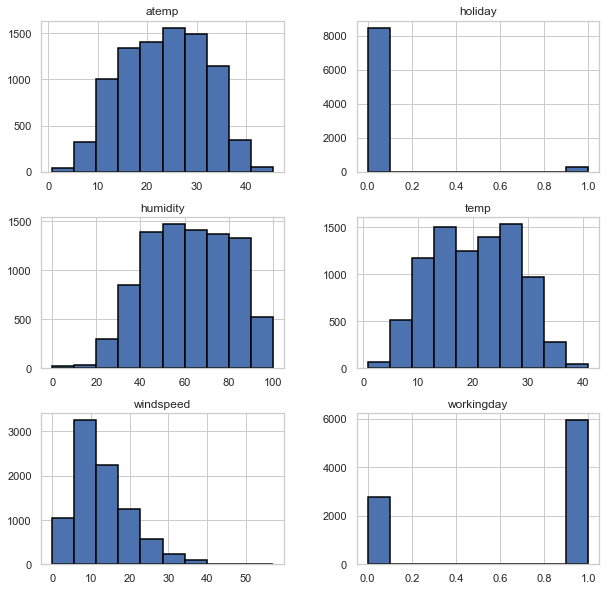

In [28]:
train.hist(edgecolor='black',linewidth=1.5,figsize=(10,10))

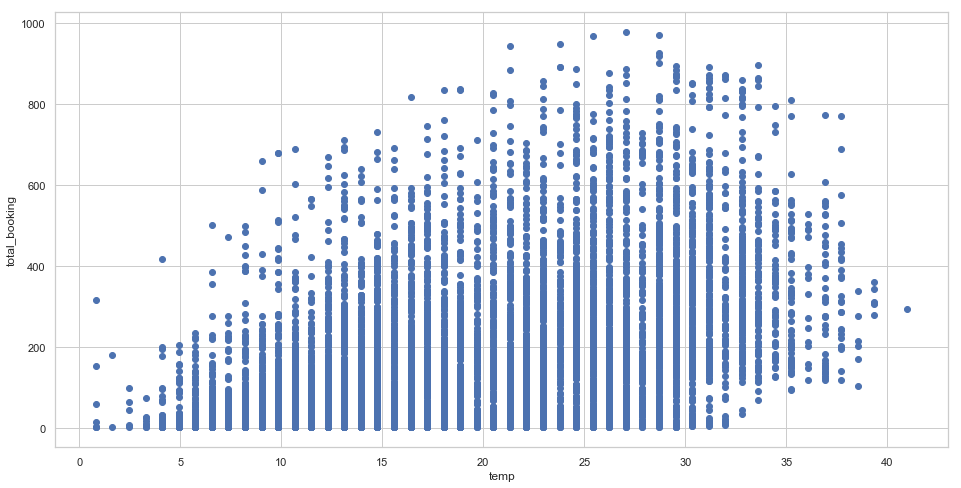

In [29]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(merged_train_copy['temp'], merged_train_copy['total_booking'])
ax.set_xlabel('temp')
ax.set_ylabel('total_booking')
plt.show()

# Checking Summary of the data

In [30]:
print('Shape -> ',merged_train_copy.shape)
print('Information about Data ->',merged_train_copy.info())
print('Describing Data ->',merged_train_copy.describe())

Shape ->  (8707, 15)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8707 entries, 0 to 8707
Data columns (total 15 columns):
season              8707 non-null object
holiday             8707 non-null int64
workingday          8707 non-null int64
weather             8707 non-null object
temp                8707 non-null float64
atemp               8707 non-null float64
humidity            8707 non-null int64
windspeed           8707 non-null float64
total_booking       8707 non-null int64
datetime_year       8707 non-null int64
datetime_month      8707 non-null int64
datetime_day        8707 non-null int64
datetime_hour       8707 non-null int64
datetime_weekday    8707 non-null object
weekend             8707 non-null bool
dtypes: bool(1), float64(3), int64(8), object(3)
memory usage: 1.3+ MB
Information about Data -> None
Describing Data ->            holiday   workingday         temp        atemp     humidity  \
count  8707.000000  8707.000000  8707.000000  8707.000000  8707.00000

# Data Preprocessing

## Missing Value Analysis

In [31]:
merged_train_copy.isnull().sum()*100/len(merged_train_copy)

season              0.0
holiday             0.0
workingday          0.0
weather             0.0
temp                0.0
atemp               0.0
humidity            0.0
windspeed           0.0
total_booking       0.0
datetime_year       0.0
datetime_month      0.0
datetime_day        0.0
datetime_hour       0.0
datetime_weekday    0.0
weekend             0.0
dtype: float64

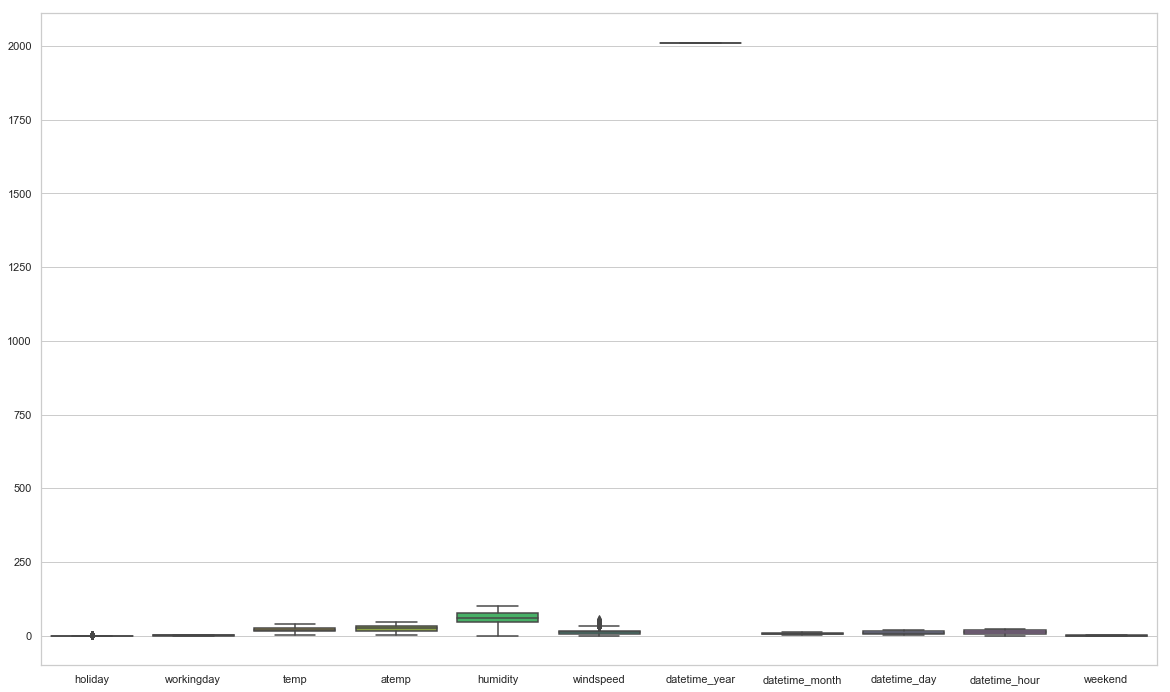

In [32]:
plt.figure(figsize=(20, 12))
sns.boxplot(data=merged_train_copy.drop('total_booking',axis=1))

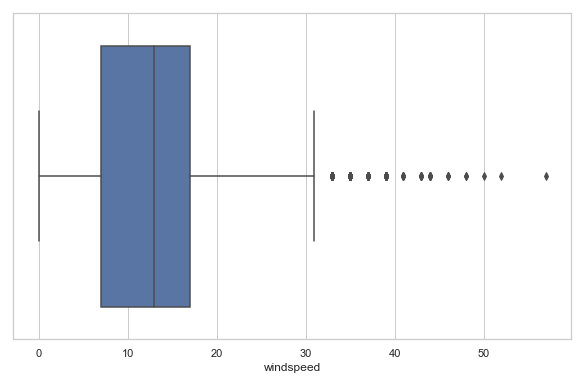

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_train_copy['windspeed'])

## Since the extreme values are practically possible. So instead of treating them as outliers, let’s try a log transformation or Standerdize all the column to same scale using Stander Scalar to nullify their effect:

In [34]:
# merged_train_copy['windspeed'] = np.log(merged_train_copy['windspeed'])

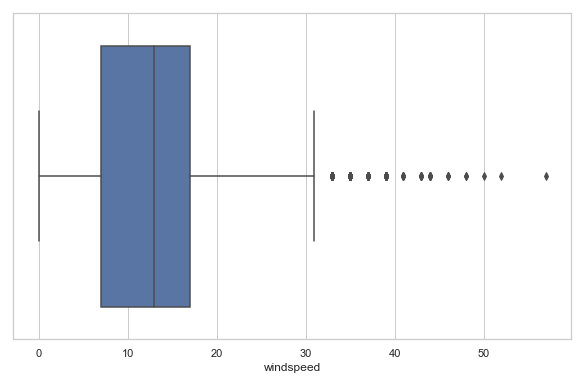

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_train_copy['windspeed'])

In [36]:
merged_train_copy_IQR=merged_train_copy.drop(['total_booking'],axis=1).copy()
Q1 = merged_train_copy_IQR.quantile(0.25)
Q3 = merged_train_copy_IQR.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

holiday            0.0000
workingday         1.0000
temp              12.3000
atemp             14.3950
humidity          31.0000
windspeed          9.9964
datetime_year      1.0000
datetime_month     6.0000
datetime_day      10.0000
datetime_hour     12.0000
weekend            1.0000
dtype: float64


## Corelation Analysis

In [37]:
cols_to_transform = [ 'season', 'weather','datetime_weekday','weekend']
#merged_train_copy = merged_train_copy.drop('datetime',axis=1,inplace=True)
merged_train_1= pd.get_dummies(merged_train_copy,columns = cols_to_transform )
merged_train_1.head()
print(merged_train_1.shape)
merged_train_1.columns

(8707, 27)


Index(['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'total_booking', 'datetime_year', 'datetime_month', 'datetime_day',
       'datetime_hour', 'season_Fall', 'season_Spring', 'season_Summer',
       'season_Winter', 'weather_ Clear + Few clouds',
       'weather_ Light Snow, Light Rain', 'weather_ Mist + Cloudy ',
       'datetime_weekday_Friday', 'datetime_weekday_Monday',
       'datetime_weekday_Saturday', 'datetime_weekday_Sunday',
       'datetime_weekday_Thursday', 'datetime_weekday_Tuesday',
       'datetime_weekday_Wednesday', 'weekend_False', 'weekend_True'],
      dtype='object')

(27, 27)


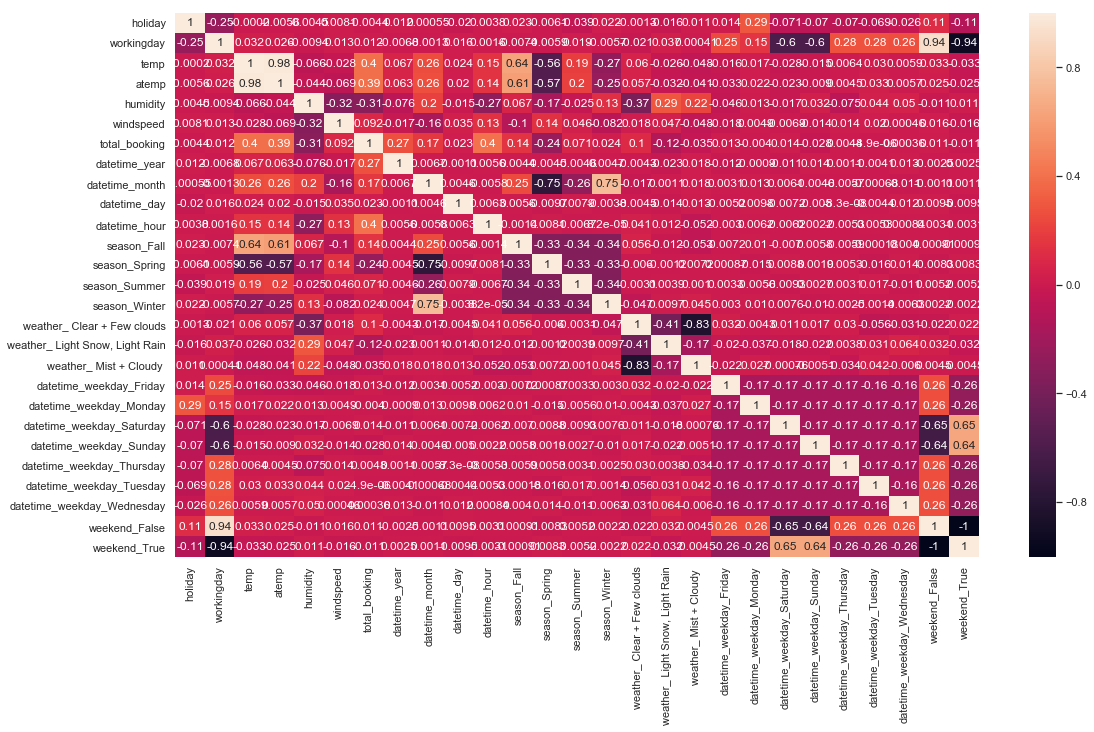

In [38]:
plt.figure(figsize=(18, 10))
merged_train_copy_corr = merged_train_1.corr()
print(merged_train_copy_corr.shape)
sns.heatmap(merged_train_copy_corr,annot=True)

In [39]:
merged_train_copy_corr

,holiday,workingday,temp,atemp,humidity,windspeed,total_booking,datetime_year,datetime_month,datetime_day,...,weather_ Mist + Cloudy,datetime_weekday_Friday,datetime_weekday_Monday,datetime_weekday_Saturday,datetime_weekday_Sunday,datetime_weekday_Thursday,datetime_weekday_Tuesday,datetime_weekday_Wednesday,weekend_False,weekend_True
holiday,1.000000,-0.249748,-0.000195,-0.005555,-0.004542,0.008059,-0.004394,0.012059,0.000546,-1.982788e-02,...,0.011271,0.013993,0.292808,-0.070887,-0.070496,-6.990686e-02,-0.069447,-0.025550,0.109765,-0.109765
workingday,-0.249748,1.000000,0.032315,0.026286,-0.009383,0.013102,0.012298,-0.006783,-0.001310,1.630456e-02,...,0.000412,0.247948,0.150775,-0.603864,-0.600528,2.799092e-01,0.278069,0.261692,0.935046,-0.935046
temp,-0.000195,0.032315,1.000000,0.984031,-0.066209,-0.027976,0.397482,0.066639,0.255704,2.448156e-02,...,-0.048383,-0.016025,0.016744,-0.027863,-0.014746,6.364526e-03,0.030090,0.005879,0.033100,-0.033100
atemp,-0.005555,0.026286,0.984031,1.000000,-0.044005,-0.069061,0.392775,0.063217,0.262980,2.045544e-02,...,-0.041372,-0.033240,0.022362,-0.023074,-0.009034,4.459078e-03,0.033115,0.005684,0.024948,-0.024948
humidity,-0.004542,-0.009383,-0.066209,-0.044005,1.000000,-0.320267,-0.307987,-0.075763,0.203302,-1.494084e-02,...,0.222157,-0.046322,0.012977,-0.016868,0.031511,-7.527302e-02,0.044246,0.049979,-0.011295,0.011295
windspeed,0.008059,0.013102,-0.027976,-0.069061,-0.320267,1.000000,0.092079,-0.017184,-0.157894,3.505929e-02,...,-0.048154,-0.017941,0.004924,-0.006854,-0.014284,1.364800e-02,0.020188,0.000465,0.016399,-0.016399
total_booking,-0.004394,0.012298,0.397482,0.392775,-0.307987,0.092079,1.000000,0.266262,0.170351,2.254617e-02,...,-0.034748,0.013269,-0.004025,0.013880,-0.028151,4.779878e-03,-0.000005,0.000363,0.011015,-0.011015
datetime_year,0.012059,-0.006783,0.066639,0.063217,-0.075763,-0.017184,0.266262,1.000000,0.006740,-1.149679e-03,...,0.018490,-0.012393,-0.000897,-0.010732,0.014062,1.077935e-03,-0.004146,0.013049,-0.002548,0.002548
datetime_month,0.000546,-0.001310,0.255704,0.262980,0.203302,-0.157894,0.170351,0.006740,1.000000,4.632583e-03,...,0.017566,0.003118,0.012816,0.006103,-0.004650,-5.676435e-03,-0.000680,-0.011133,-0.001145,0.001145
datetime_day,-0.019828,0.016305,0.024482,0.020455,-0.014941,0.035059,0.022546,-0.001150,0.004633,1.000000e+00,...,0.013213,-0.005170,0.009753,-0.007192,-0.005011,-8.253218e-08,-0.004444,0.012190,0.009477,-0.009477


## Removing the column  corelation >=0.9

In [40]:
columns = np.full((merged_train_copy_corr.shape[0],), True, dtype=bool)
for i in range(merged_train_copy_corr.shape[0]):
    for j in range(i+1, merged_train_copy_corr.shape[0]):
        if merged_train_copy_corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = merged_train_1.columns[columns]
merged_train_copy_1 = merged_train_1[selected_columns]

In [41]:
print(merged_train_copy_1.shape)
print(merged_train_copy_1.columns)
merged_train_copy_1.head()

(8707, 25)
Index(['holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'total_booking', 'datetime_year', 'datetime_month', 'datetime_day',
       'datetime_hour', 'season_Fall', 'season_Spring', 'season_Summer',
       'season_Winter', 'weather_ Clear + Few clouds',
       'weather_ Light Snow, Light Rain', 'weather_ Mist + Cloudy ',
       'datetime_weekday_Friday', 'datetime_weekday_Monday',
       'datetime_weekday_Saturday', 'datetime_weekday_Sunday',
       'datetime_weekday_Thursday', 'datetime_weekday_Tuesday',
       'datetime_weekday_Wednesday', 'weekend_True'],
      dtype='object')


,holiday,workingday,temp,humidity,windspeed,total_booking,datetime_year,datetime_month,datetime_day,datetime_hour,...,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy,datetime_weekday_Friday,datetime_weekday_Monday,datetime_weekday_Saturday,datetime_weekday_Sunday,datetime_weekday_Thursday,datetime_weekday_Tuesday,datetime_weekday_Wednesday,weekend_True
0,0,1,22.14,77,16.9979,504,2012,5,2,19,...,0,0,0,0,0,0,0,0,1,0
1,0,1,28.70,79,19.0012,5,2012,9,5,4,...,0,0,0,0,0,0,0,0,1,0
2,0,1,5.74,50,22.0028,139,2011,1,13,9,...,0,0,0,0,0,0,1,0,0,0
3,0,1,13.94,29,8.9981,209,2011,11,18,16,...,0,0,1,0,0,0,0,0,0,0
4,0,1,30.34,51,19.0012,184,2011,9,13,13,...,0,0,0,0,0,0,0,1,0,0


In [42]:
train_X_V = merged_train_copy_1/merged_train_copy_1.mean()
round(train_X_V.var(),6)

holiday                            34.112789
workingday                          0.470086
temp                                0.148940
humidity                            0.096992
windspeed                           0.406602
total_booking                       0.884893
datetime_year                       0.000000
datetime_month                      0.277665
datetime_day                        0.299818
datetime_hour                       0.354047
season_Fall                         2.977957
season_Spring                       3.078574
season_Summer                       2.963472
season_Winter                       2.983417
weather_ Clear + Few clouds         0.513530
weather_ Light Snow, Light Rain    11.843543
weather_ Mist + Cloudy              2.825896
datetime_weekday_Friday             6.096870
datetime_weekday_Monday             5.988649
datetime_weekday_Saturday           5.835050
datetime_weekday_Sunday             5.900044
datetime_weekday_Thursday           5.999885
datetime_w

## No need to drop any Columns as variance of all are high atleast more than 0.03 after standarized them

 # #PCA

In [43]:
y=merged_train_copy_1['total_booking']
X=merged_train_copy_1.drop('total_booking',axis=1)
print(X.head())
X.isnull().any()

   holiday  workingday   temp  humidity  windspeed  datetime_year  \
0        0           1  22.14        77    16.9979           2012   
1        0           1  28.70        79    19.0012           2012   
2        0           1   5.74        50    22.0028           2011   
3        0           1  13.94        29     8.9981           2011   
4        0           1  30.34        51    19.0012           2011   

   datetime_month  datetime_day  datetime_hour  season_Fall  ...  \
0               5             2             19            0  ...   
1               9             5              4            1  ...   
2               1            13              9            0  ...   
3              11            18             16            0  ...   
4               9            13             13            1  ...   

   weather_ Light Snow, Light Rain  weather_ Mist + Cloudy   \
0                                0                        0   
1                                0                

holiday                            False
workingday                         False
temp                               False
humidity                           False
windspeed                          False
datetime_year                      False
datetime_month                     False
datetime_day                       False
datetime_hour                      False
season_Fall                        False
season_Spring                      False
season_Summer                      False
season_Winter                      False
weather_ Clear + Few clouds        False
weather_ Light Snow, Light Rain    False
weather_ Mist + Cloudy             False
datetime_weekday_Friday            False
datetime_weekday_Monday            False
datetime_weekday_Saturday          False
datetime_weekday_Sunday            False
datetime_weekday_Thursday          False
datetime_weekday_Tuesday           False
datetime_weekday_Wednesday         False
weekend_True                       False
dtype: bool

In [601]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error 
# model = LinearRegression()

# # fit the model with the training data
# model.fit(X,y)

# # predict the target on the train dataset
# # predict_train = model.predict(train_x)
# all_accuracies = cross_val_score(estimator=model, X=X, y=y, cv=10,scoring='r2')
# print("Accuracy: " + str(round(100*accuracy.mean(), 2)) + "%")

In [44]:
from sklearn.preprocessing import StandardScaler
col_names = X.columns
SS=StandardScaler()
X = SS.fit_transform(X)
X=pd.DataFrame(X, columns=col_names)
X.head()

C:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,holiday,workingday,temp,humidity,windspeed,datetime_year,datetime_month,datetime_day,datetime_hour,season_Fall,...,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy,datetime_weekday_Friday,datetime_weekday_Monday,datetime_weekday_Saturday,datetime_weekday_Sunday,datetime_weekday_Thursday,datetime_weekday_Tuesday,datetime_weekday_Wednesday,weekend_True
0,-0.171225,0.685589,0.242639,0.799759,0.507110,0.989830,-0.444529,-1.461473,1.076828,-0.579516,...,-0.290592,-0.594904,-0.405015,-0.408658,-0.414002,-0.411716,-0.408276,-0.405592,2.472562,-0.641057
1,-0.171225,0.685589,1.082326,0.903938,0.751714,0.989830,0.718137,-0.914081,-1.100180,1.725577,...,-0.290592,-0.594904,-0.405015,-0.408658,-0.414002,-0.411716,-0.408276,-0.405592,2.472562,-0.641057
2,-0.171225,0.685589,-1.856581,-0.606652,1.118210,-1.010274,-1.607195,0.545632,-0.374511,-0.579516,...,-0.290592,-0.594904,-0.405015,-0.408658,-0.414002,-0.411716,2.449326,-0.405592,-0.404439,-0.641057
3,-0.171225,0.685589,-0.806971,-1.700527,-0.469668,-1.010274,1.299470,1.457953,0.641426,-0.579516,...,-0.290592,-0.594904,2.469042,-0.408658,-0.414002,-0.411716,-0.408276,-0.405592,-0.404439,-0.641057
4,-0.171225,0.685589,1.292248,-0.554562,0.751714,-1.010274,0.718137,0.545632,0.206024,1.725577,...,-0.290592,-0.594904,-0.405015,-0.408658,-0.414002,-0.411716,-0.408276,2.465535,-0.404439,-0.641057


In [46]:
from sklearn.decomposition import PCA
pca = PCA()
new_feat1 = pca.fit_transform(X)
new_feat1.shape

(8707, 24)

In [47]:
np.round(pca.explained_variance_ratio_, 3)

array([0.129, 0.108, 0.093, 0.076, 0.061, 0.056, 0.054, 0.051, 0.049,
       0.048, 0.048, 0.047, 0.042, 0.041, 0.035, 0.033, 0.019, 0.009,
       0.001, 0.   , 0.   , 0.   , 0.   , 0.   ])

In [48]:
np.round(pca.explained_variance_ratio_.cumsum(), 3)

array([0.129, 0.237, 0.33 , 0.406, 0.467, 0.523, 0.577, 0.628, 0.676,
       0.725, 0.773, 0.819, 0.861, 0.902, 0.937, 0.971, 0.99 , 0.999,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   ])

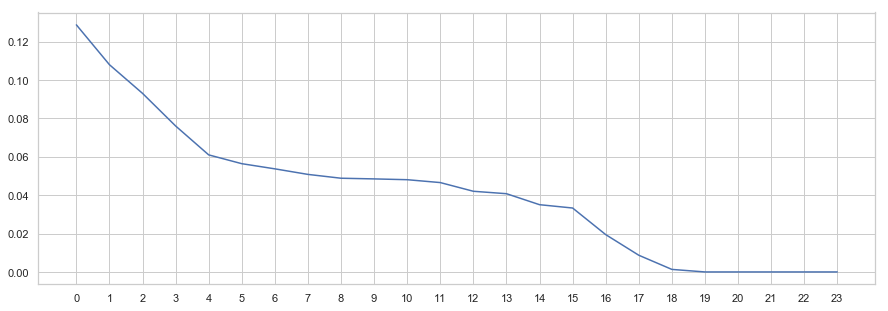

In [49]:
plt.figure(figsize=(15,5))
plt.plot(range(new_feat1.shape[1]) ,pca.explained_variance_ratio_)
plt.xticks(range(new_feat1.shape[1]))
plt.grid(True)
plt.show()

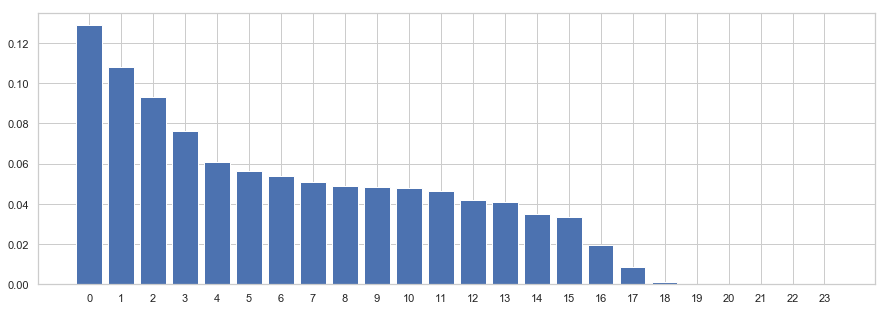

In [50]:
plt.figure(figsize=(15,5))
plt.bar(range(new_feat1.shape[1]) ,pca.explained_variance_ratio_)
plt.xticks(range(new_feat1.shape[1]))
plt.grid(True)
plt.show()

## As variance ratio is changing no column need to drop

In [51]:
np.isnan(X).any()

holiday                            False
workingday                         False
temp                               False
humidity                           False
windspeed                          False
datetime_year                      False
datetime_month                     False
datetime_day                       False
datetime_hour                      False
season_Fall                        False
season_Spring                      False
season_Summer                      False
season_Winter                      False
weather_ Clear + Few clouds        False
weather_ Light Snow, Light Rain    False
weather_ Mist + Cloudy             False
datetime_weekday_Friday            False
datetime_weekday_Monday            False
datetime_weekday_Saturday          False
datetime_weekday_Sunday            False
datetime_weekday_Thursday          False
datetime_weekday_Tuesday           False
datetime_weekday_Wednesday         False
weekend_True                       False
dtype: bool

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error 
model = LinearRegression()

# fit the model with the training data
model.fit(X,y)

# predict the target on the train dataset
# predict_train = model.predict(train_x)
all_accuracies = cross_val_score(estimator=model, X=X, y=y, cv=10,scoring='r2')
print("Accuracy: " + str(round(100*all_accuracies.mean(), 2)) + "%")

Accuracy: 39.17%


In [55]:
pca = PCA(n_components=19)
new_feat2 = pca.fit_transform(X)
new_feat2.shape

(8707, 19)

In [56]:
%%time
from sklearn.neighbors import KNeighborsClassifier
import warnings; warnings.simplefilter('ignore')
knn = KNeighborsClassifier(n_neighbors=4)
for i in range(2,30):
      print('k=',i,cross_val_score(knn,new_feat2,y,cv=i,scoring="accuracy").mean())

k= 2 0.012666005513442363
k= 3 0.013502203496077036
k= 4 0.013061388643332082
k= 5 0.01501360400623519
k= 6 0.013491193177919823
k= 7 0.01452844030312941
k= 8 0.013429191715279629
k= 9 0.01498603633677341
k= 10 0.01489372287437001
k= 11 0.014567960556514319
k= 12 0.015296522416988588
k= 13 0.015807136959274996
k= 14 0.015196937011040782
k= 15 0.01555971204548968
k= 16 0.015927471797861033
k= 17 0.01569759840211377
k= 18 0.016258551348156965
k= 19 0.016630891266927926
k= 20 0.017142554817061322
k= 21 0.017086129329920565
k= 22 0.0174470808661765
k= 23 0.017749902350489784
k= 24 0.01892409544881234
k= 25 0.019800566188388036
k= 26 0.019773518940034738
k= 27 0.02079626398876875
k= 28 0.021244706442974517
k= 29 0.021391302984093644
Wall time: 45.8 s


In [57]:
k_range = range(1, 31)
k_scores = []
from sklearn.neighbors import KNeighborsClassifier
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,new_feat2, y, cv=14, scoring='accuracy')
    k_scores.append(scores.mean())
    print('k:',k,'--',scores.mean())

k: 1 -- 0.009204853555938666
k: 2 -- 0.012004717226267609
k: 3 -- 0.014468097665442266
k: 4 -- 0.015196937011040782
k: 5 -- 0.015336211120722126
k: 6 -- 0.015429713481520264
k: 7 -- 0.014950486543169087
k: 8 -- 0.014370735005232267
k: 9 -- 0.015531640703845107
k: 10 -- 0.014804522671530583
k: 11 -- 0.0146934288753059
k: 12 -- 0.014418703735279531
k: 13 -- 0.014060073487991117
k: 14 -- 0.014427735153962453
k: 15 -- 0.015272829696482106
k: 16 -- 0.015561595605329746
k: 17 -- 0.015756407725795514
k: 18 -- 0.01564593013778471
k: 19 -- 0.01566263793719638
k: 20 -- 0.016811368005072058
k: 21 -- 0.01660483600728984
k: 22 -- 0.016401012676105005
k: 23 -- 0.016878000607284914
k: 24 -- 0.016725666485816852
k: 25 -- 0.016471540088312673
k: 26 -- 0.016100263656140028
k: 27 -- 0.016825106243778858
k: 28 -- 0.016937950727888656
k: 29 -- 0.016678767739792832
k: 30 -- 0.016680845307032677


In [615]:
model = LinearRegression()

# fit the model with the training data
model.fit(new_feat2,y)

# predict the target on the train dataset
# predict_train = model.predict(train_x)
all_accuracies = cross_val_score(estimator=model, X=new_feat2, y=y, cv=14,scoring='r2')
print("Accuracy: " + str(round(100*all_accuracies.mean(), 2)) + "%")

Accuracy: 35.77%


In [544]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier()
clf.fit(X, y)
all_accuracies = cross_val_score(estimator=clf, X=X, y=y, cv=14,scoring='r2')
print("Accuracy: " + str(round(100*all_accuracies.mean(), 2)) + "%")

Accuracy: 62.28%


In [549]:
clf = DecisionTreeClassifier()
clf.fit(new_feat2, y)
all_accuracies = cross_val_score(estimator=clf, X=new_feat2, y=y, cv=14,scoring='accuracy')
print("Accuracy: " + str(round(100*all_accuracies.mean(), 2)) + "%")

Accuracy: 0.8%


In [546]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(new_feat2, y)
all_accuracies = cross_val_score(estimator=gnb, X=new_feat2, y=y, cv=14,scoring='accuracy')
all_accuracies
print("Accuracy: " + str(round(100*all_accuracies.mean(), 2)) + "%")

Accuracy: 0.54%


In [550]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=1,max_depth=10)
rfr.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [623]:
all_accuracies = cross_val_score(estimator=rfr, X=X, y=y, cv=14,scoring='r2')
print("Accuracy: " + str(round(100*all_accuracies.mean(), 2)) + "%")

Accuracy: 92.27%


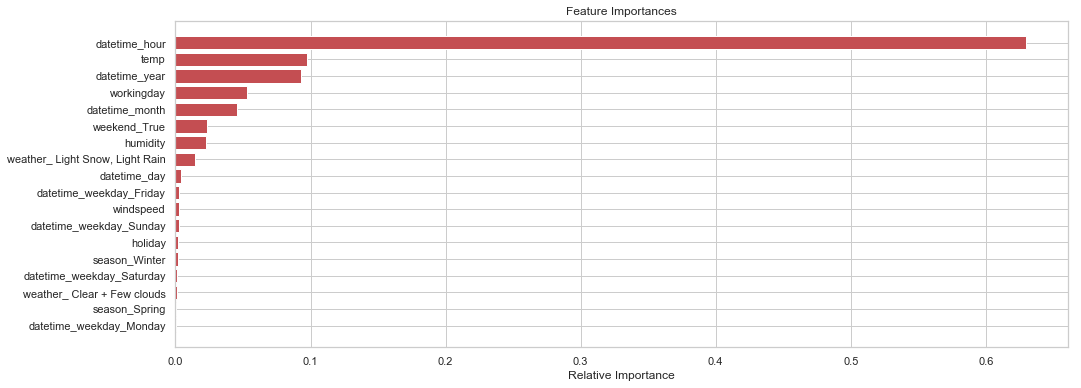

<Figure size 432x288 with 0 Axes>

In [624]:
plt.figure(figsize=(16, 6))
features = X.columns
importances = rfr.feature_importances_
indices = np.argsort(importances)[-18:]
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices],color='r',align='center')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
plt.savefig('labelEnc_features.png')

In [625]:
clf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
clf.fit(X, y)
all_accuracies = cross_val_score(estimator=clf, X=X, y=y, cv=14,scoring='r2')
print("Accuracy: " + str(round(100*all_accuracies.mean(), 2)) + "%")

MemoryError: could not allocate 104464384 bytes

In [616]:
clf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
clf.fit(new_feat2, y)
all_accuracies = cross_val_score(estimator=clf, X=new_feat2, y=y, cv=14,scoring='accuracy')
print("Accuracy: " + str(round(100*all_accuracies.mean(), 2)) + "%")

Accuracy: 0.9%


In [460]:
from sklearn.model_selection import GridSearchCV
grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

In [461]:
gd_sr = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=14,
                     n_jobs=-1)

In [462]:
gd_sr.fit(new_feat2, y)

MemoryError: could not allocate 43712512 bytes

In [ ]:
best_parameters = gd_sr.best_params_
print(best_parameters)

In [ ]:
best_result = gd_sr.best_score_
print(best_result)

In [622]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(new_feat2, y)
all_accuracies = cross_val_score(estimator=clf, X=new_feat2, y=y, cv=14,scoring='accuracy')
print("Accuracy: " + str(round(100*all_accuracies.mean(), 2)) + "%")

Accuracy: 1.52%


In [617]:
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

In [618]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
# fit model on all training data

In [619]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [620]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 1.81%


In [190]:
# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
        # select features using threshold
        selection = SelectFromModel(model, threshold=thresh, prefit=True)
        select_X_train = selection.transform(X_train)
        # train model
        selection_model = XGBClassifier()
        selection_model.fit(select_X_train, y_train)
        # eval model
        select_X_test = selection.transform(X_test)
        y_pred = selection_model.predict(select_X_test)
        predictions = [round(value) for value in y_pred]
        accuracy = accuracy_score(y_test, predictions)
        print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.000, n=24, Accuracy: 1.81%
Thresh=0.000, n=24, Accuracy: 1.81%
Thresh=0.036, n=22, Accuracy: 1.81%
Thresh=0.037, n=21, Accuracy: 1.67%
Thresh=0.037, n=20, Accuracy: 1.77%
Thresh=0.038, n=19, Accuracy: 1.95%
Thresh=0.038, n=18, Accuracy: 1.77%
Thresh=0.039, n=17, Accuracy: 1.98%
Thresh=0.041, n=16, Accuracy: 2.02%
Thresh=0.041, n=15, Accuracy: 1.81%
Thresh=0.042, n=14, Accuracy: 2.12%
Thresh=0.042, n=13, Accuracy: 1.88%
Thresh=0.042, n=12, Accuracy: 1.77%
Thresh=0.042, n=11, Accuracy: 2.02%
Thresh=0.044, n=10, Accuracy: 1.88%
Thresh=0.044, n=9, Accuracy: 1.98%
Thresh=0.046, n=8, Accuracy: 2.05%
Thresh=0.046, n=7, Accuracy: 2.02%
Thresh=0.048, n=6, Accuracy: 2.19%
Thresh=0.049, n=5, Accuracy: 2.51%
Thresh=0.050, n=4, Accuracy: 1.74%
Thresh=0.063, n=3, Accuracy: 1.57%
Thresh=0.064, n=2, Accuracy: 1.74%
Thresh=0.072, n=1, Accuracy: 1.60%
